In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_dyn
import ELPH_utils


#global hyperparameters
kmax = 4.
n_kmax = 80

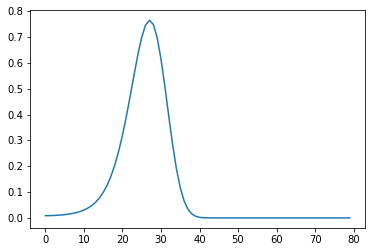

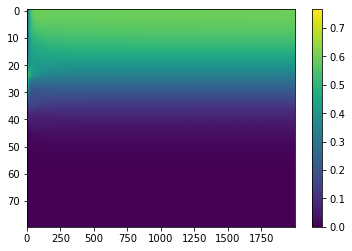

In [2]:
init = ELPH_dyn.get_init_cond_gauss(kmax = kmax, n_kmax = n_kmax, max_pos = 0.15, width = 0.05, density=0.1)
plt.plot(init[:n_kmax])
plt.show()

nkdyn = ELPH_dyn.get_el_dynamics(init, n_kmax = n_kmax)
plt.imshow(nkdyn, aspect='auto')
plt.colorbar()
plt.show()

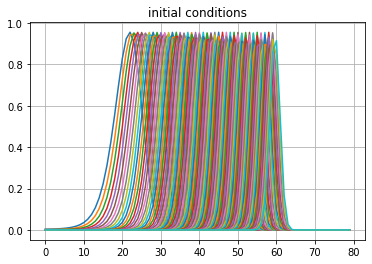

In [13]:
n_runs = 100

paras = np.zeros((n_runs,3))

paras[:,0] = np.linspace(0.1,0.7,n_runs) #max_pos
paras[:,1] = 0.03 #width
paras[:,2] = 0.075 #density

#test initial conditions
inits = ELPH_utils.get_gaussian_inits(kmax, n_kmax, paras)

plt.grid()
for k in range(n_runs):
    plt.plot(inits[k][:n_kmax])

plt.title('initial conditions')
plt.show()


In [14]:


runs = ELPH_utils.get_runs_gaussian_init(kmax, n_kmax, paras, tmax=2000, n_tmax=400)

run  1  from  100
run  2  from  100
run  3  from  100
run  4  from  100
run  5  from  100
run  6  from  100
run  7  from  100
run  8  from  100
run  9  from  100
run  10  from  100
run  11  from  100
run  12  from  100
run  13  from  100
run  14  from  100
run  15  from  100
run  16  from  100
run  17  from  100
run  18  from  100
run  19  from  100
run  20  from  100
run  21  from  100
run  22  from  100
run  23  from  100
run  24  from  100
run  25  from  100
run  26  from  100
run  27  from  100
run  28  from  100
run  29  from  100
run  30  from  100
run  31  from  100
run  32  from  100
run  33  from  100
run  34  from  100
run  35  from  100
run  36  from  100
run  37  from  100
run  38  from  100
run  39  from  100
run  40  from  100
run  41  from  100
run  42  from  100
run  43  from  100
run  44  from  100
run  45  from  100
run  46  from  100
run  47  from  100
run  48  from  100
run  49  from  100
run  50  from  100
run  51  from  100
run  52  from  100
run  53  from  100
ru

In [15]:
ELPH_utils.save_runs(runs, filename='../runs_w0.03')